In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import plotly.express as px

In [4]:
table={"customers": pd.read_csv(r"C:\Users\ABC\Documents\data Analytics completed projects\Projects\Task 9 Business Insights & Executive Report for\olist_customers_dataset.csv"),
      "geolocation": pd.read_csv(r"C:\Users\ABC\Documents\data Analytics completed projects\Projects\Task 9 Business Insights & Executive Report for\olist_geolocation_dataset.csv"),
      "order_items": pd.read_csv(r"C:\Users\ABC\Documents\data Analytics completed projects\Projects\Task 9 Business Insights & Executive Report for\olist_order_items_dataset.csv"),
      "order_payments": pd.read_csv(r"C:\Users\ABC\Documents\data Analytics completed projects\Projects\Task 9 Business Insights & Executive Report for\olist_order_payments_dataset.csv"),
      "order_reviews": pd.read_csv(r"C:\Users\ABC\Documents\data Analytics completed projects\Projects\Task 9 Business Insights & Executive Report for\olist_order_reviews_dataset.csv"),
      "orders": pd.read_csv(r"C:\Users\ABC\Documents\data Analytics completed projects\Projects\Task 9 Business Insights & Executive Report for\olist_orders_dataset.csv"),
      "products":pd.read_csv(r"C:\Users\ABC\Documents\data Analytics completed projects\Projects\Task 9 Business Insights & Executive Report for\olist_products_dataset.csv"),
      "sellers": pd.read_csv(r"C:\Users\ABC\Documents\data Analytics completed projects\Projects\Task 9 Business Insights & Executive Report for\olist_sellers_dataset.csv"),
      "product_category": pd.read_csv(r"C:\Users\ABC\Documents\data Analytics completed projects\Projects\Task 9 Business Insights & Executive Report for\product_category_name_translation.csv")}

#### shape of all dataframe

In [7]:
for i in table:
 print(i,table[i].shape)

customers (99441, 5)
geolocation (1000163, 5)
order_items (112650, 7)
order_payments (103886, 5)
order_reviews (99224, 7)
orders (99441, 8)
products (32951, 9)
sellers (3095, 4)
product_category (71, 2)


#### Info of all dataframe

In [9]:
for i in table:
    print(f"TABLE: {i.upper()}")
    print( "-"*50)  # separator line
    print(i,table[i].shape)
    print("-"*50)  # separator line
    table[i].info()
    print("-"*50 )  # separator line


TABLE: CUSTOMERS
--------------------------------------------------
customers (99441, 5)
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
--------------------------------------------------
TABLE: GEOLOCATION
--------------------------------------------------
geolocation (1000163, 5)
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column    

### Identify Nulls

In [16]:
for i in table:
    print(f"TABLE: {i.upper()}")
    print( "-"*50)  # separator line
    print(i,table[i].shape)
    print("-"*50)  # separator line
    print(table[i].isna().sum())
    print("-"*50 )  # separator line

TABLE: CUSTOMERS
--------------------------------------------------
customers (99441, 5)
--------------------------------------------------
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
--------------------------------------------------
TABLE: GEOLOCATION
--------------------------------------------------
geolocation (1000163, 5)
--------------------------------------------------
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
--------------------------------------------------
TABLE: ORDER_ITEMS
--------------------------------------------------
order_items (112650, 7)
--------------------------------------------------
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
p

#### Order_reviews table  
- review_comment_title       87656
- review_comment_message     58247
#### Orders table                 
- order_approved_at               160 
- order_delivered_carrier_date    1783
- order_delivered_customer_date   2965
- we also need to change the date type
#### products table
- product_category_name         610 
- product_name_lenght           610
- product_description_lenght    610
- product_photos_qty            610

## Handle null
#### for order_reviews
  - we will delete the columns because its text data anyway we dont need these columns
#### for orders
  - we wont be using these dates much to so leaving it as it is
#### for products
  - only 1.8% values or product category are null so we will replace them with unknown/other

In [18]:
table["orders"].isna().sum()/len(table["orders"])*100

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.160899
order_delivered_carrier_date     1.793023
order_delivered_customer_date    2.981668
order_estimated_delivery_date    0.000000
dtype: float64

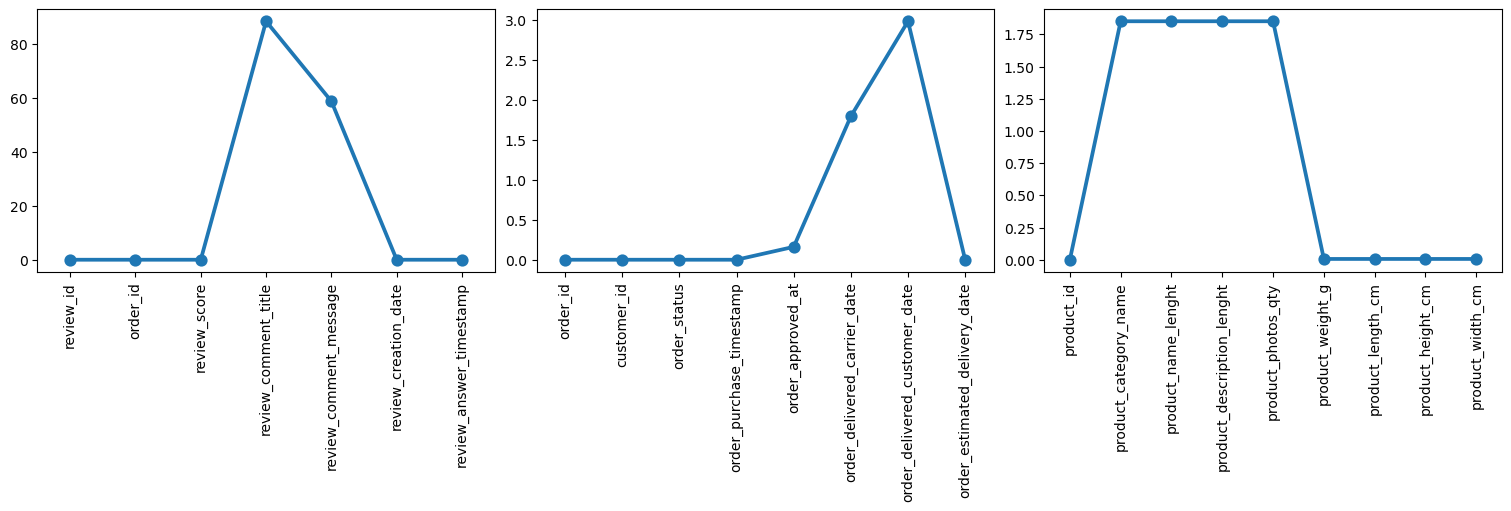

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)

axes=axes.ravel()
for i, predictor in enumerate(["order_reviews","orders","products"]):
    per=table[predictor].isna().sum()/len(table[predictor])*100
    sns.pointplot(per, ax=axes[i])
    axes[i].tick_params(axis="x", rotation=90)


In [26]:
products=pd.DataFrame(table["products"])

In [28]:
products["product_category_name"].value_counts()

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 73, dtype: int64

In [30]:
products["product_category_name"]=products["product_category_name"].fillna("Unknown")

In [32]:
table["products"]=products

In [34]:
table["products"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [36]:
table["order_reviews"].drop(columns=["review_comment_message","review_comment_title"], inplace=True)

# ✅ handled nulls

#### change the data type of dates

In [38]:
orders=table["orders"]

In [40]:
orders["order_purchase_timestamp"]=pd.to_datetime(orders["order_purchase_timestamp"])

In [42]:
orders["order_approved_at"]=pd.to_datetime(orders["order_approved_at"])

In [44]:
orders["order_delivered_carrier_date"]=pd.to_datetime(orders["order_delivered_carrier_date"])

In [46]:
orders["order_delivered_customer_date"]=pd.to_datetime(orders["order_delivered_customer_date"])

In [48]:
orders["order_estimated_delivery_date"]=pd.to_datetime(orders["order_estimated_delivery_date"])

In [50]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


#  ✅  handled data type

### Customer Segmentation

In [52]:
customers=pd.DataFrame(table["customers"])

In [54]:
customers.groupby("customer_city").agg(Total_Customers=("customer_unique_id","count")).sort_values("Total_Customers", ascending=False).reset_index()

,customer_city,Total_Customers
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
...,...,...
4114,ibiara,1
4115,rio espera,1
4116,rio dos indios,1
4117,rio dos cedros,1


In [292]:
df=customers.groupby("customer_state").agg(Total_Customers=("customer_unique_id","count")).sort_values("Total_Customers", ascending=False).reset_index()

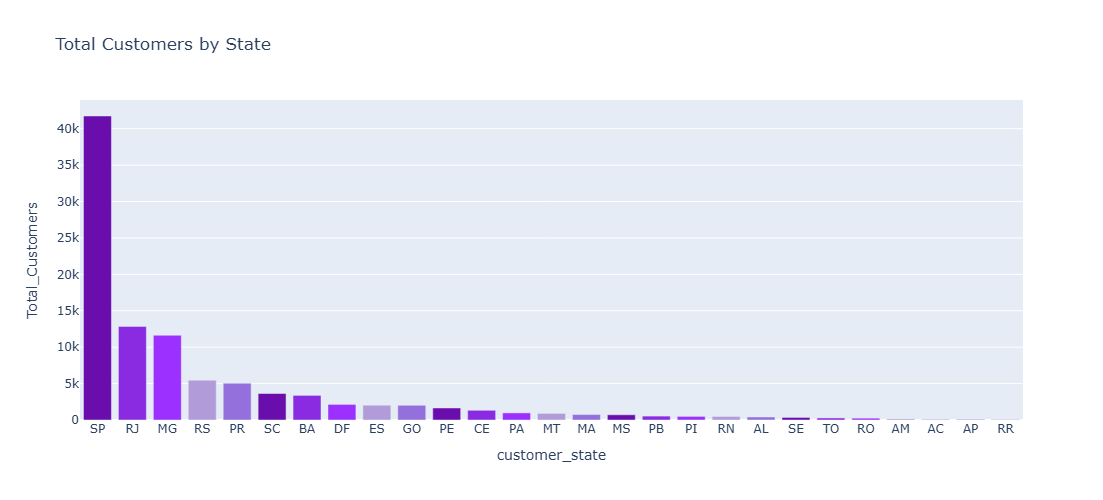

In [302]:
purple_colors = ["#6a0dad", "#8a2be2", "#9b30ff", "#b19cd9", "#9370db"]

fig = px.bar(
    df,
    x="customer_state",
    y="Total_Customers",
    title="Total Customers by State",
    color="customer_state",  # color each bar differently
    color_discrete_sequence=purple_colors
)

fig.update_layout(
    showlegend=False,   # hide legend
    width=900,
    height=500
)

fig.show()


In [59]:
order_payments=table["order_payments"]

In [60]:
payment_method_segm=customers\
.merge(orders, on="customer_id", how="inner")\
.merge(order_payments, on="order_id")\
.groupby("payment_type").agg(Total_customers=("customer_id","count")).sort_values("Total_customers", ascending=False).reset_index()
payment_method_segm.loc[4,"payment_type"]=np.nan
payment_method_segm.dropna(inplace=True)

In [64]:
payment_method_segm

,payment_type,Total_customers
0,credit_card,76795
1,boleto,19784
2,voucher,5775
3,debit_card,1529


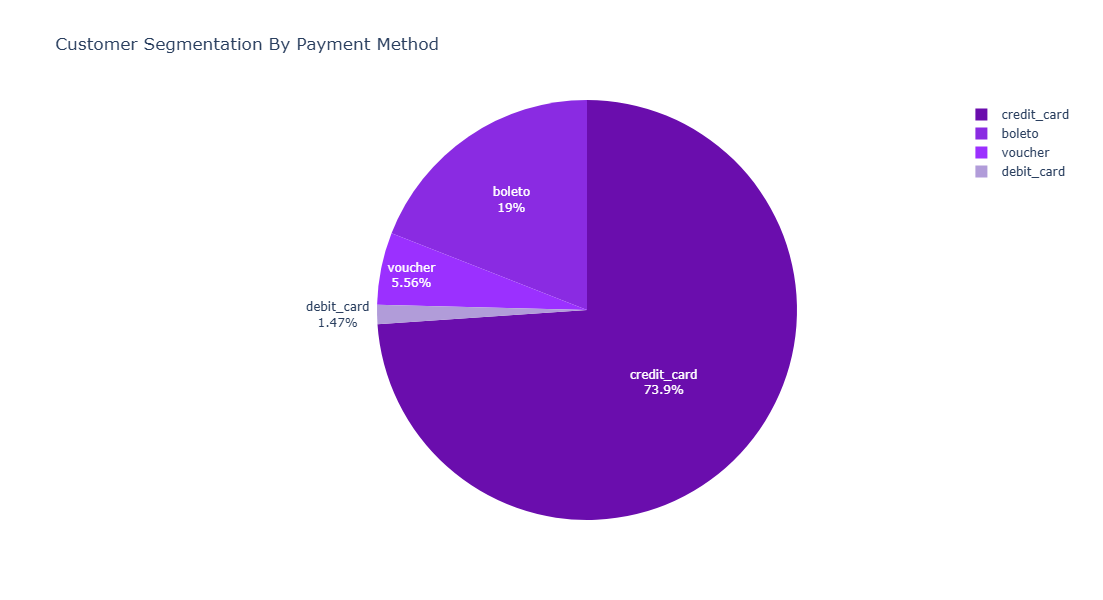

In [286]:
purple_colors = ["#6a0dad", "#8a2be2", "#9b30ff", "#b19cd9", "#9370db"]  # adjust as needed

fig = px.pie(
    payment_method_segm,
    values="Total_customers",
    names="payment_type",
    title="Customer Segmentation By Payment Method",
    color_discrete_sequence=purple_colors
)

fig.update_traces(textinfo="percent+label")  

fig.update_layout(
    width=800,
    height=600   
)

fig.show()

In [68]:
new_vsReturning=customers\
.merge(orders, on="customer_id", how="inner").groupby("customer_unique_id")\
.agg(total_orders=("customer_unique_id","count")).sort_values("total_orders", ascending=False).reset_index()
new_vsReturning["new_or_returning"]= np.where(new_vsReturning["total_orders"]>2,"Returning","New")
new_vsReturning=new_vsReturning[["customer_unique_id","new_or_returning"]]

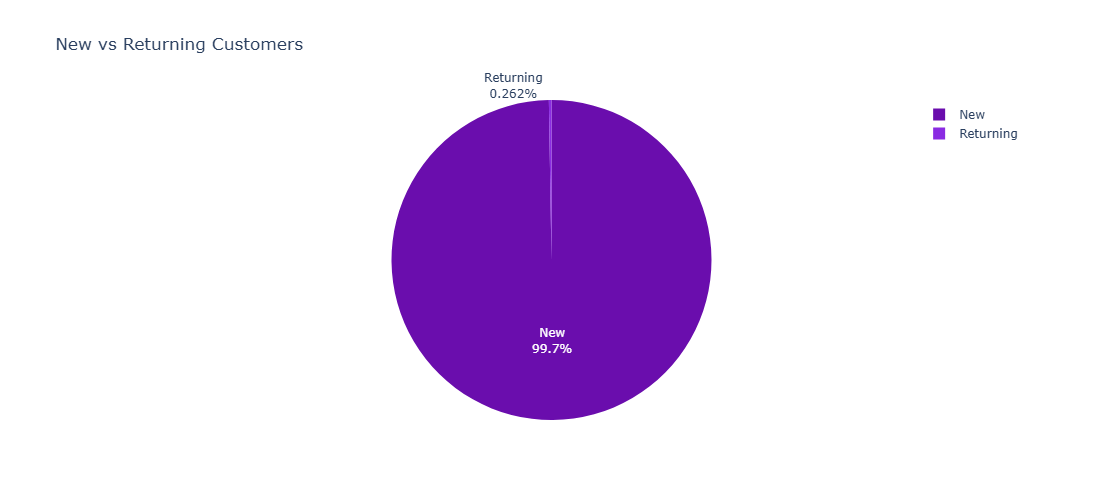

In [284]:

seg_counts = new_vsReturning["new_or_returning"].value_counts().reset_index()
seg_counts.columns = ["Segment", "Count"]
purple_colors = ["#6a0dad", "#8a2be2"] 
fig = px.pie(
    seg_counts,
    values="Count",
    names="Segment",
    title="New vs Returning Customers",
    color_discrete_sequence=purple_colors
)

fig.update_traces(textinfo="percent+label")  
fig.update_layout(width=600, height=500)  
fig.show()


In [72]:
orderStatus=orders.merge(customers, on="customer_id")["order_status"].value_counts()

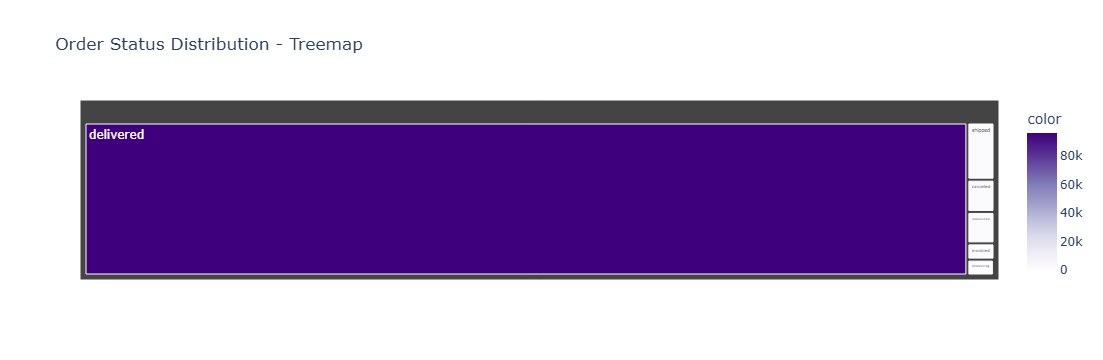

In [276]:

fig = px.treemap(
    names=orderStatus.index,
    parents=[""]*len(orderStatus),
    values=orderStatus.values,
    title="Order Status Distribution - Treemap",
    color=orderStatus.values,         
    color_continuous_scale="Purples"
)

fig.show()


#### Customers that never orders

In [77]:
orders.rename(columns={"customer_id":"customerid"}, inplace=True)

In [79]:
df=customers.merge(orders, left_on='customer_id', right_on='customerid' , how="left")
df[df["customerid"].isna()]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,customerid,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [81]:
orders.rename(columns={"customerid":"customer_id"}, inplace=True)

### There Arent Customers that never bought anything

## Cetegories that were never Bought

In [85]:
order_items=table["order_items"]

In [87]:
order_items.rename(columns={"product_id":"productid"}, inplace=True)

In [89]:
df=order_items.merge(products, left_on="productid", right_on="product_id", how="left")
df[df["product_id"].isna()]

,order_id,order_item_id,productid,seller_id,shipping_limit_date,price,freight_value,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm


### All products were bought

In [92]:
order_items.rename(columns={"productid":"product_id"}, inplace=True)

## Product id and category that cancelled

In [97]:
df=order_items\
.merge(orders, on="order_id", how="inner").merge(products, on="product_id")[["product_id","product_category_name","order_status"]]

In [99]:
df["order_status"].value_counts()

order_status
delivered      110197
shipped          1185
canceled          542
invoiced          359
processing        357
unavailable         7
approved            3
Name: count, dtype: int64

In [101]:
df[df["order_status"]=="canceled"]["product_category_name"].value_counts().reset_index()

,product_category_name,count
0,esporte_lazer,51
1,utilidades_domesticas,49
2,informatica_acessorios,46
3,beleza_saude,36
4,moveis_decoracao,36
5,brinquedos,34
6,automotivo,30
7,relogios_presentes,21
8,bebes,20
9,ferramentas_jardim,19


## sales by year, month and day

In [104]:
orders["purchase_year"] = orders["order_approved_at"].dt.year.astype("Int64")
orders["purchase_monthname"] = orders["order_approved_at"].dt.month_name()
orders["purchase_month"] = orders["order_approved_at"].dt.month.astype("Int64")
orders["purchase_dayname"] = orders["order_approved_at"].dt.day_name()
orders["purchase_day"] = orders["order_approved_at"].dt.day.astype("Int64")


In [108]:
df1=orders.merge(order_payments)

In [110]:
df1=df1.groupby(["purchase_year","purchase_month","purchase_monthname"])\
      .agg(payment_value=("payment_value","sum"))\
      .sort_values(["purchase_year","purchase_month","payment_value"], ascending=[True,True,False])\
      .reset_index()
df1

,purchase_year,purchase_month,purchase_monthname,payment_value
0,2016,10,October,58380.74
1,2016,12,December,19.62
2,2017,1,January,131835.87
3,2017,2,February,291836.22
4,2017,3,March,446020.61
5,2017,4,April,413537.47
6,2017,5,May,593119.02
7,2017,6,June,515293.57
8,2017,7,July,585260.30
9,2017,8,August,672772.79


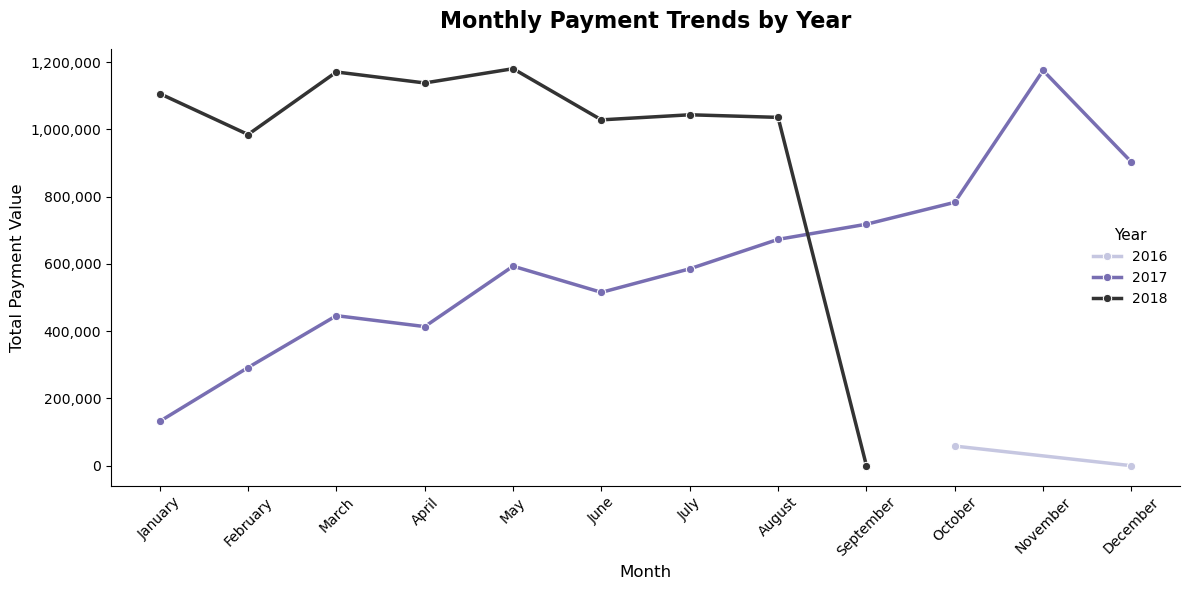

In [274]:
month_order = [
    "January","February","March","April","May","June",
    "July","August","September","October","November","December"]
df1["purchase_monthname"] = pd.Categorical(
    df1["purchase_monthname"], 
    categories=month_order, 
    ordered=True)
plt.figure(figsize=(12,6))
sns.lineplot(
    data=df1,
    x="purchase_monthname",
    y="payment_value",
    hue="purchase_year",
    marker="o",
    linewidth=2.5,
    palette="Purples_d" )
plt.title("Monthly Payment Trends by Year", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Payment Value", fontsize=12)
plt.legend(title="Year", fontsize=10, title_fontsize=11, loc="center right", frameon=False)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=45, fontsize=10)
sns.despine()
plt.tight_layout()
plt.show()

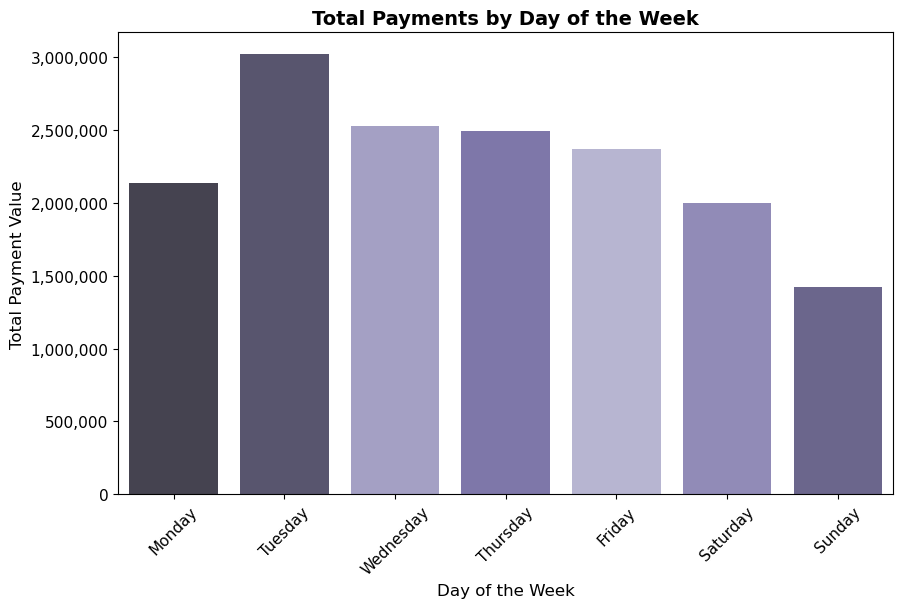

In [272]:
by_day=orders.merge(order_payments)[["purchase_day","purchase_dayname","payment_value"]]\
.sort_values(["purchase_day","payment_value"], ascending=[True,False])
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
plt.figure(figsize=(10,6))
sns.barplot(
    data=by_day,
    x="purchase_dayname",
    y="payment_value",
    order=day_order,
    estimator="sum",
    errorbar=None,  
    hue="purchase_dayname", 
    legend=False,
    palette="Purples_d")
plt.title("Total Payments by Day of the Week", fontsize=14, fontweight="bold")
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Total Payment Value", fontsize=12)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.show()

In [115]:
order_reviews=table["order_reviews"]

In [116]:
reviews=customers.merge(orders).merge(order_reviews).groupby("review_score").agg(total_count=("customer_id","count")).reset_index()

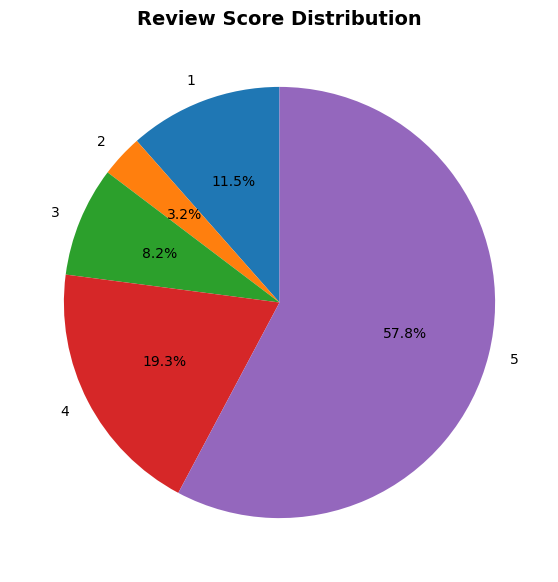

In [268]:
fig, ax = plt.subplots(figsize=(7,7))  # bigger size & centered
colors = sns.color_palette("Purples_d", len(reviews))  # get palette
reviews.set_index("review_score")["total_count"].plot(
    kind="pie",
    autopct='%1.1f%%',
    startangle=90,
    legend=False,
    color=colors,
    ax=ax
)

ax.set_ylabel("")  # remove axis label
ax.set_title("Review Score Distribution", fontsize=14, fontweight="bold")
plt.show()



In [122]:
orders["purchase_to_approval_days"] = (orders["order_approved_at"] - orders["order_purchase_timestamp"]).dt.days
orders["purchase_to_carrier_days"] = (orders["order_delivered_carrier_date"] - orders["order_purchase_timestamp"]).dt.days
orders["purchase_to_delivered_customer"] = (orders["order_delivered_customer_date"] - orders["order_purchase_timestamp"]).dt.days
orders["purchase_to_delivered_customer"] = (orders["order_delivered_customer_date"] - orders["order_purchase_timestamp"]).dt.days
orders[["purchase_to_approval_days","purchase_to_carrier_days","purchase_to_delivered_customer"]].mean()

purchase_to_approval_days          0.269800
purchase_to_carrier_days           2.743114
purchase_to_delivered_customer    12.094086
dtype: float64

In [124]:
orders[["purchase_to_approval_days","purchase_to_carrier_days","purchase_to_delivered_customer"]].mean()

purchase_to_approval_days          0.269800
purchase_to_carrier_days           2.743114
purchase_to_delivered_customer    12.094086
dtype: float64

In [126]:
sellers=table["sellers"]

# Univariate Analysis On New Vs Returning Customers

In [314]:
df=customers.merge(orders, on="customer_id").merge(order_items, on="order_id").merge(products, on="product_id")\
.merge(sellers, on="seller_id").merge(order_reviews, on="order_id").merge(order_payments, on="order_id")

In [316]:
df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'purchase_year', 'purchase_monthname',
       'purchase_month', 'purchase_dayname', 'purchase_day',
       'purchase_to_approval_days', 'purchase_to_carrier_days',
       'purchase_to_delivered_customer', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state', 'review_id',
       'review_score', 'review_creation_date', 'review_answer_timestamp',
       'payment_sequential', 'p

In [318]:
df=df[["customer_id","customer_unique_id","customer_city","customer_state","order_id","order_status","order_approved_at","purchase_year",
    "product_id","product_category_name","review_score","payment_type","payment_installments","payment_value"]]

In [320]:
order_counts=df.groupby("customer_unique_id")["order_id"].count()
order_counts

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    1
0000b849f77a49e4a4ce2b2a4ca5be3f    1
0000f46a3911fa3c0805444483337064    1
0000f6ccb0745a6a4b88665a16c9f078    1
0004aac84e0df4da2b147fca70cf8255    1
                                   ..
fffcf5a5ff07b0908bd4e2dbc735a684    2
fffea47cd6d3cc0a88bd621562a9d061    1
ffff371b4d645b6ecea244b27531430a    1
ffff5962728ec6157033ef9805bacc48    1
ffffd2657e2aad2907e67c3e9daecbeb    1
Name: order_id, Length: 94720, dtype: int64

In [322]:
df["Customer_type"]=df["customer_unique_id"].map(lambda x: "New" if order_counts[x]==1 else "Returning")

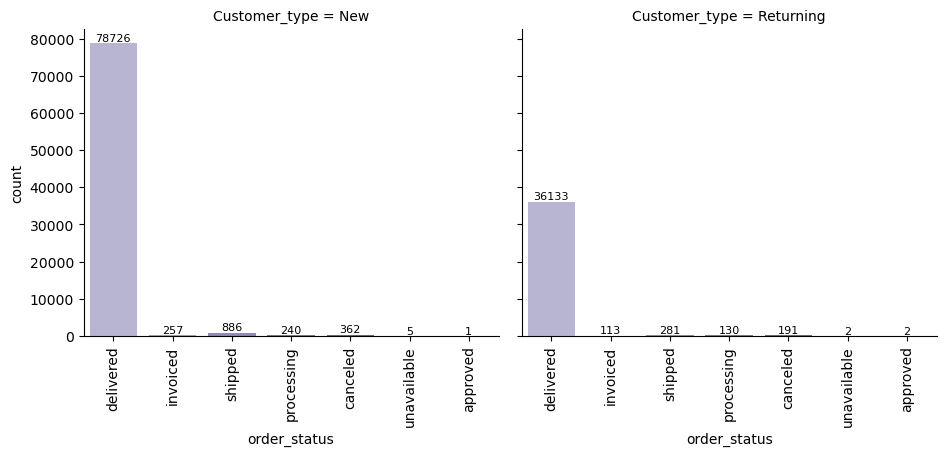

In [324]:
g = sns.catplot(
    data=df,
    x="order_status",
    col="Customer_type",
    kind="count",
    col_wrap=2,
    height=4,
    aspect=1.2,
    hue="order_status",
    palette="Purples_d",
    legend=False)
for ax in g.axes.flatten():
    plt.setp(ax.get_xticklabels(), rotation=90)
    for container in ax.containers: 
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8)


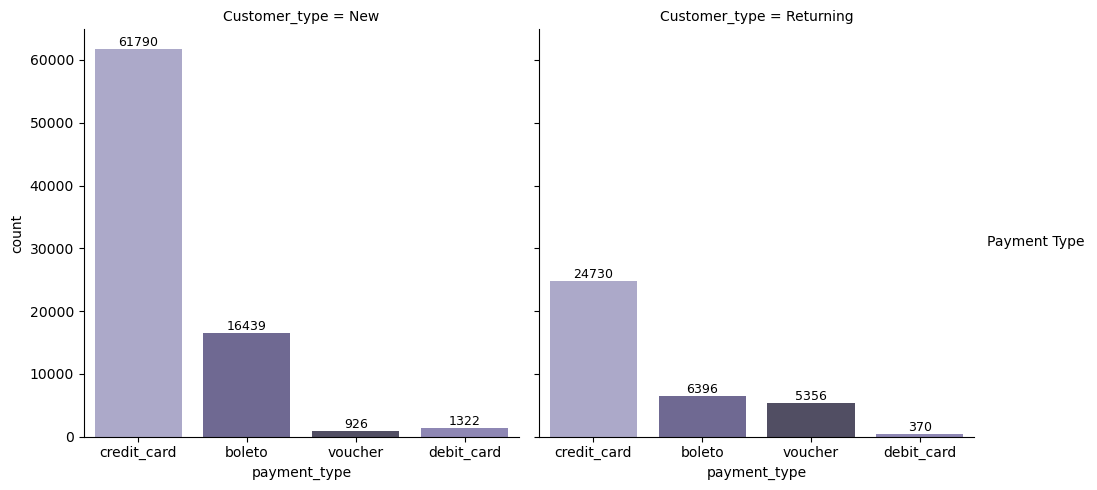

In [325]:
# Get payment_type order by frequency
order = df["payment_type"].value_counts().index.tolist()

g = sns.catplot(
    data=df,
    x="payment_type",
    col="Customer_type",
    kind="count",
    hue="payment_type",
    order=order,
    palette="Purples_d",
    legend=False)
for ax in g.axes.flatten():
    for p in ax.patches:
        value = int(p.get_height())
        ax.text(
            p.get_x() + p.get_width() / 2., 
            p.get_height(),         
            value,             
            ha="center", va="bottom", fontsize=9)
g.add_legend(title="Payment Type")


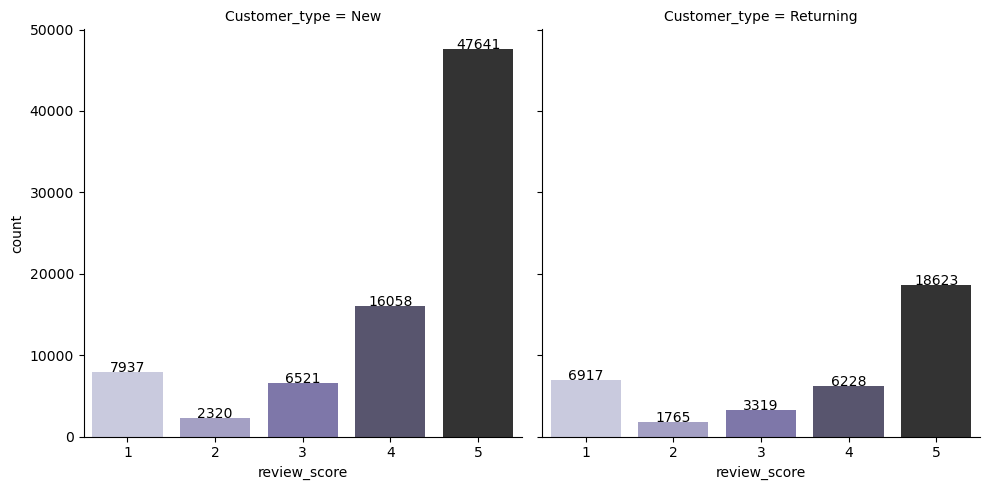

In [336]:
g = sns.catplot(
    data=df,
    x="review_score",
    col="Customer_type",
    kind="count",
    hue="review_score",
    palette="Purples_d",
    legend=False
)

for ax in g.axes.flat:
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2, p.get_height(), int(p.get_height()), ha="center")


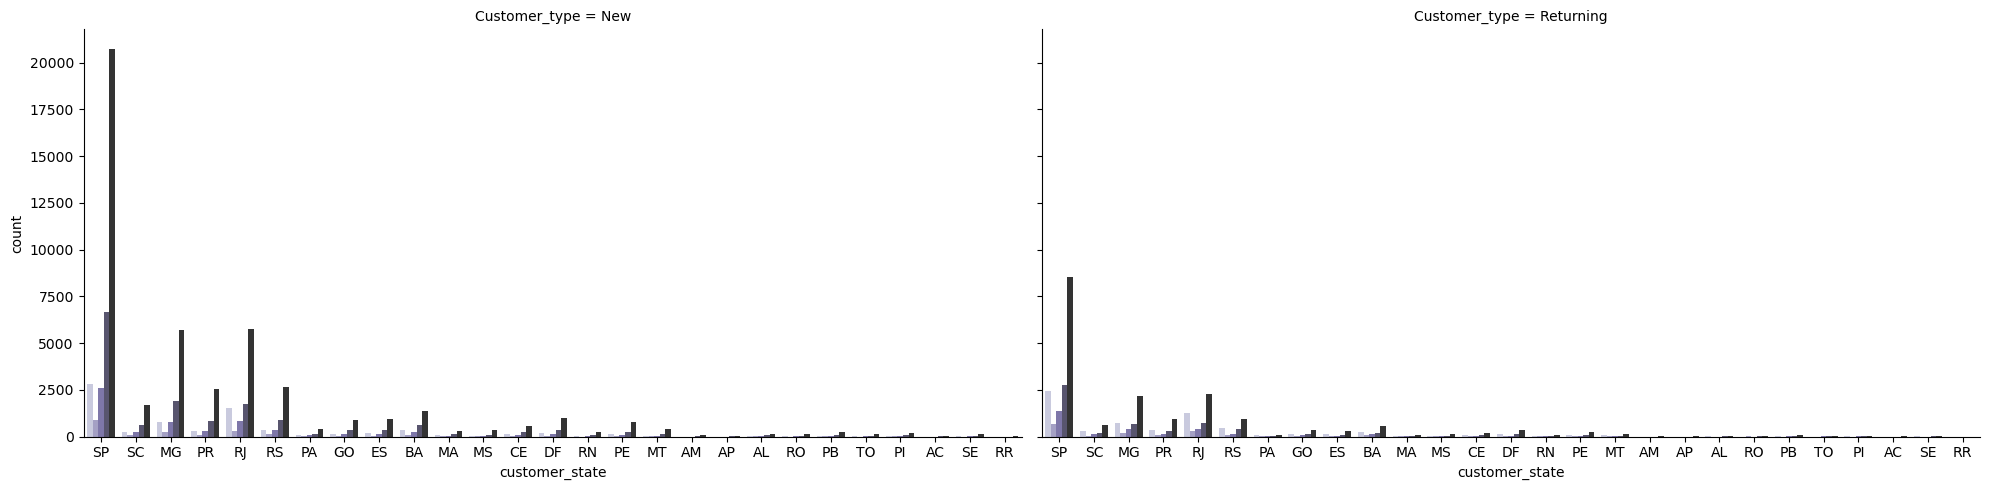

In [344]:
g = sns.catplot(
    data=df,
    x="customer_state",
    col="Customer_type",
    kind="count",
    hue="review_score",
    palette="Purples_d",
    legend=False,
    height=5,
    aspect=2
)

In [348]:
df["Installment_Type"]=np.where(df["payment_installments"]==1,"Full Payment","Installment")

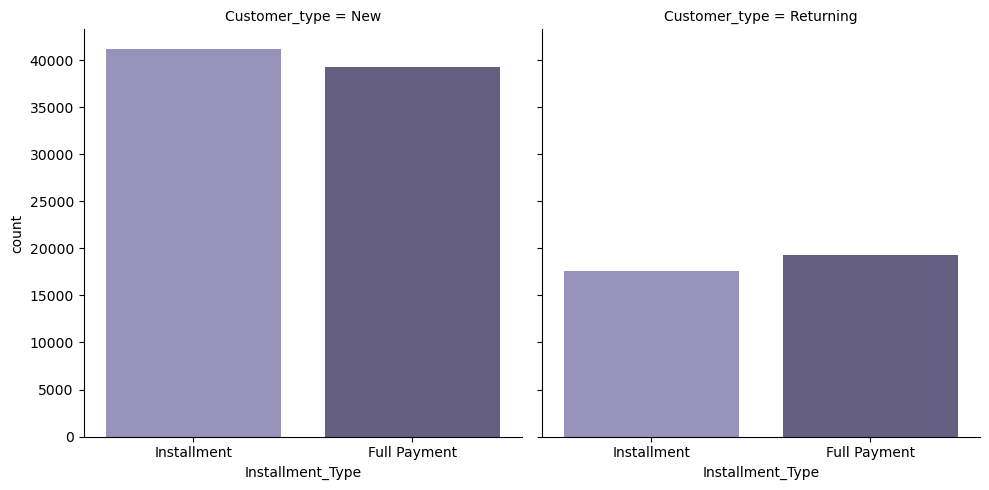

In [356]:
sns.catplot(df, x="Installment_Type", col="Customer_type", kind="count", hue="Installment_Type", palette="Purples_d")